In [4]:
from graphembedding.ge.models import DeepWalk
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./seealsology-data.tsv', sep='\t')#tsv文件，分割符是'\t'
G = nx.from_pandas_edgelist(df, 'source', 'target',edge_attr=True,create_using=nx.Graph())
print(type(G))
print(len(G))# target有2399种

<class 'networkx.classes.graph.Graph'>
2399


In [3]:
model = DeepWalk(G,walk_length=10, num_walks=5, workers=1)
result = model.train(window_size=4,iter=20)#'DeepWalk' object has no attribute 'fit'
embeddings = model.get_embeddings()

Learning embedding vectors...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Learning embedding vectors done!


In [4]:
embeddings

{'life insurance': array([-3.78675431e-01,  2.44417470e-02, -2.92235136e-01,  2.33049560e-02,
         1.56963314e-03, -4.19372439e-01,  3.69272567e-02,  1.33912027e-01,
         4.80473012e-01,  2.29981631e-01, -3.13435914e-03,  1.32823005e-01,
         2.42726490e-01, -2.49690607e-01,  5.41261792e-01, -2.57398248e-01,
         1.23416834e-01, -2.56309155e-02,  9.25307795e-02, -2.10127994e-01,
        -5.89054167e-01,  4.56148991e-03,  4.21840400e-01, -1.61728382e+00,
        -8.30394149e-01, -2.93764025e-01, -4.15300190e-01,  4.34544683e-01,
        -3.88733894e-02,  2.47966629e-02,  2.23372832e-01,  9.91676562e-03,
        -2.78741211e-01, -3.97450179e-01, -3.33813995e-01,  5.39878607e-01,
         4.30324674e-01,  9.25353169e-02, -8.56141269e-01, -3.70167382e-02,
         3.57939333e-01,  5.50206304e-02,  4.97116297e-01, -5.72517693e-01,
        -1.54571891e-01,  1.41147956e-01,  1.07608996e-01, -1.77440614e-01,
         1.20567366e-01, -4.34643269e-01, -4.21013348e-02,  4.26753610

In [5]:
print(result.wv.most_similar('critical illness insurance'))

[('total permanent disability insurance', 0.9078778028488159), ('tontine', 0.7039618492126465), ('corporate-owned life insurance', 0.6780316829681396), ("servicemembers' group life insurance", 0.6770698428153992), ('pet insurance', 0.6626378893852234), ('permanent life insurance', 0.6596050262451172), ('return of premium life insurance', 0.649688720703125), ('prescription analytics', 0.6442908048629761), ('life insurance', 0.6441485285758972), ('the hospital uninsured patient discount act (illinois)', 0.6322285532951355)]


<class 'numpy.ndarray'>


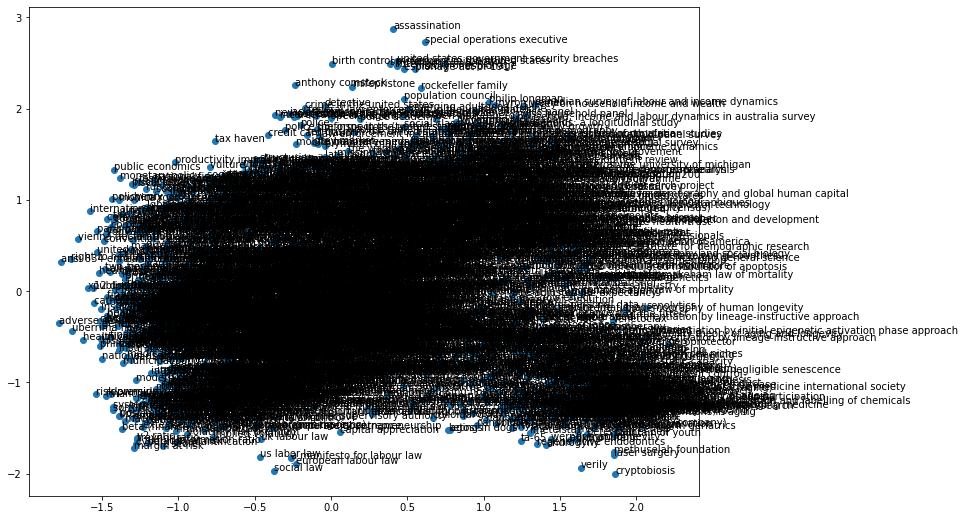

In [6]:
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = model.w2v_model.wv[word_list]#115 * 100维
    print(type(X))
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # print(result)
    # 绘制节点向量
    plt.figure(figsize=(12, 9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        # 用word注释点xy
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

plot_nodes(model.w2v_model.wv.index_to_key)

In [7]:
len(model.w2v_model.wv.index_to_key)

2399

In [8]:
len(model.w2v_model.wv['world values survey'])

128